In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

sns.set_style("whitegrid")
%matplotlib inline

In [8]:
data = pd.read_csv('../data/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [9]:
data = load_breast_cancer()

print("Keys in the dataset objects: ", data.keys())
print("\nFeature names: ", data.feature_names)
print("\nTarget names: ", data.target_names)

Keys in the dataset objects:  dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target names:  ['malignant' 'benign']


In [10]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df['diagnosis'] = data.target
df['diagnosis'] = df['diagnosis'].map({0: 'M', 1: 'B'})
print("Dataset Shape: ", df.shape)
df.head()

Dataset Shape:  (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [11]:
print("Missing values in each column: ")
print(df.isnull().sum())
print("\nDataset Info: ")
df.info()

Missing values in each column: 
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
diagnosis                  0
dtype: int64

Dataset Info: 
<class 'pandas.core.frame.DataFrame'>
Ra

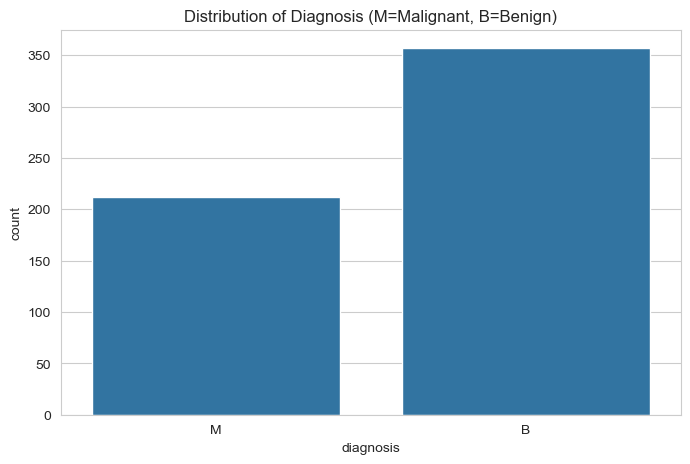

Diagnosis value counts:
diagnosis
B    357
M    212
Name: count, dtype: int64

Diagnosis percentages:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='diagnosis')
plt.title('Distribution of Diagnosis (M=Malignant, B=Benign)')
plt.show()

print("Diagnosis value counts:")
print(df['diagnosis'].value_counts())
print("\nDiagnosis percentages:")
print(df['diagnosis'].value_counts(normalize=True) * 100)

In [13]:
df.describe

<bound method NDFrame.describe of      mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean c

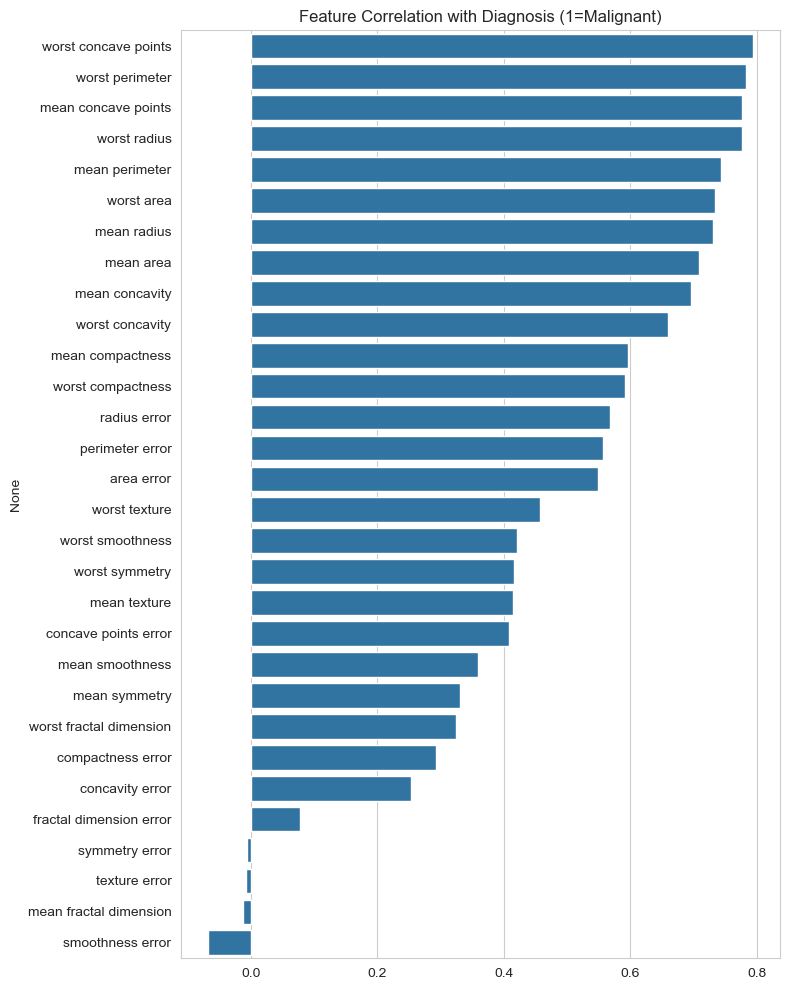

In [14]:
df_numeric = df.copy()
df_numeric['diagnosis'] = df_numeric['diagnosis'].map({'M': 1, 'B': 0})

corr_matrix = df_numeric.corr()

plt.figure(figsize=(8, 10))
corr_with_target = corr_matrix['diagnosis'].sort_values(ascending=False)[1:]  # Exclude diagnosis itself
sns.barplot(y=corr_with_target.index, x=corr_with_target.values)
plt.title('Feature Correlation with Diagnosis (1=Malignant)')
plt.tight_layout()
plt.show()

In [15]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']  # This is our 'M' or 'B'

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (569, 30)
Target shape: (569,)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (455, 30)
Testing set size: (114, 30)


In [17]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("First 5 rows of ORIGINAL X_train:")
print(X_train.iloc[:5, :3].values) # Showing first 3 features

print("\nFirst 5 rows of SCALED X_train:")
print(X_train_scaled[:5, :3]) # Showing first 3 features

First 5 rows of ORIGINAL X_train:
[[ 16.02  23.24 102.7 ]
 [ 12.32  12.39  78.85]
 [ 12.85  21.37  82.63]
 [ 14.9   22.53 102.1 ]
 [ 18.61  20.25 122.1 ]]

First 5 rows of SCALED X_train:
[[ 0.51855873  0.89182579  0.4246317 ]
 [-0.51636409 -1.63971029 -0.54134872]
 [-0.36811839  0.45551496 -0.38824993]
 [ 0.20528479  0.72616767  0.40033031]
 [ 1.2430047   0.19419511  1.21037678]]


<h2>Model Training & Evaluation</h2>

In [18]:
#Import Models and Evaluation Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [19]:
#Train and Evaluate Logistic Regression

logreg_model = LogisticRegression(random_state=42, max_iter=1000)

logreg_model.fit(X_train_scaled, y_train)

y_pred_logreg = logreg_model.predict(X_test_scaled)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy: {:.2f}%".format(accuracy_logreg * 100))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))

y_pred_proba_logreg = logreg_model.predict_proba(X_test_scaled)[:, 1]
y_test_numeric = np.where(y_test == 'M', 1, 0)
roc_auc_logreg = roc_auc_score(y_test_numeric, y_pred_proba_logreg)
print("Logistic Regression ROC-AUC Score: {:.3f}".format(roc_auc_logreg))

Logistic Regression Accuracy: 96.49%

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Logistic Regression ROC-AUC Score: 0.996


In [20]:
#Train and Evaluate Random Forest

rf_model = RandomForestClassifier(random_state = 42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf * 100))

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

y_pred_proba_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_rf = roc_auc_score(y_test_numeric, y_pred_proba_rf)
print("Random Forest ROC-AUC Score: {:.3f}".format(roc_auc_rf))

Random Forest Accuracy: 97.37%

Random Forest Classification Report:
              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

Random Forest ROC-AUC Score: 0.993


<h2>Confusion Matrix</h2>

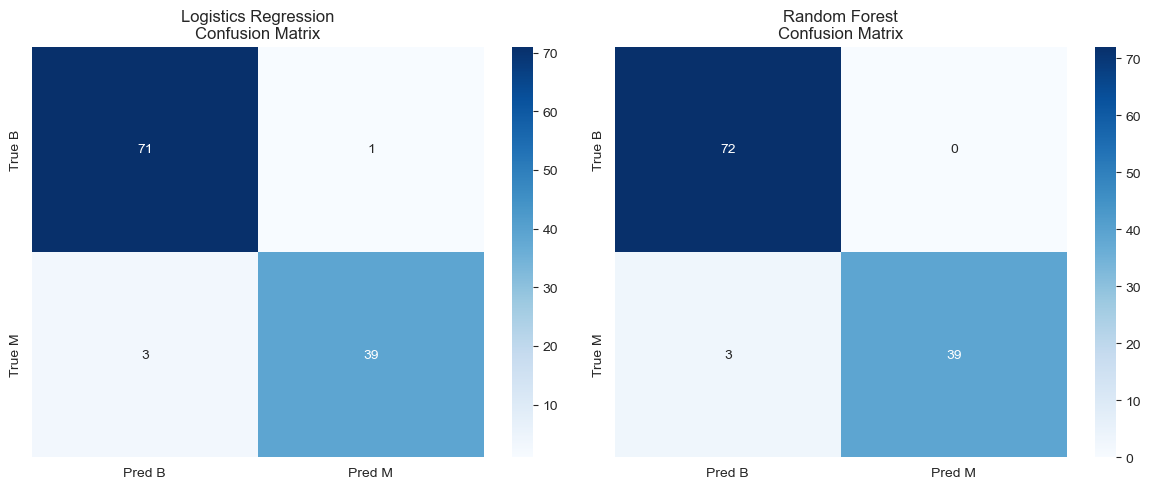

In [21]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=['Pred B', 'Pred M'], yticklabels=['True B', 'True M'])
axes[0].set_title('Logistics Regression\nConfusion Matrix')

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1], xticklabels=['Pred B', 'Pred M'], yticklabels=['True B', 'True M'])
axes[1].set_title('Random Forest\nConfusion Matrix')

plt.tight_layout()
plt.show()

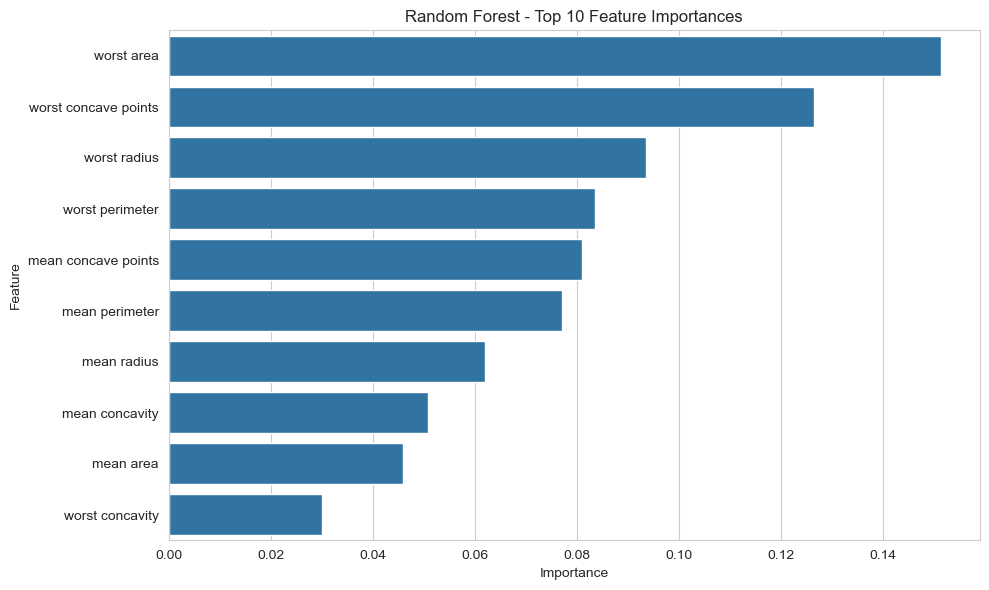

Random Forest Top 5 Most Important Features: 
                 Feature  Importance
23            worst area    0.151412
27  worst concave points    0.126497
20          worst radius    0.093475
22       worst perimeter    0.083642
7    mean concave points    0.081082


In [22]:
feature_importances = rf_model.feature_importances_

features_df = pd.DataFrame({
    'Feature' : X.columns,
    'Importance' : feature_importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=features_df.head(10), x='Importance', y='Feature')
plt.title('Random Forest - Top 10 Feature Importances')
plt.tight_layout()
plt.show()

print("Random Forest Top 5 Most Important Features: ")
print(features_df.head(5))

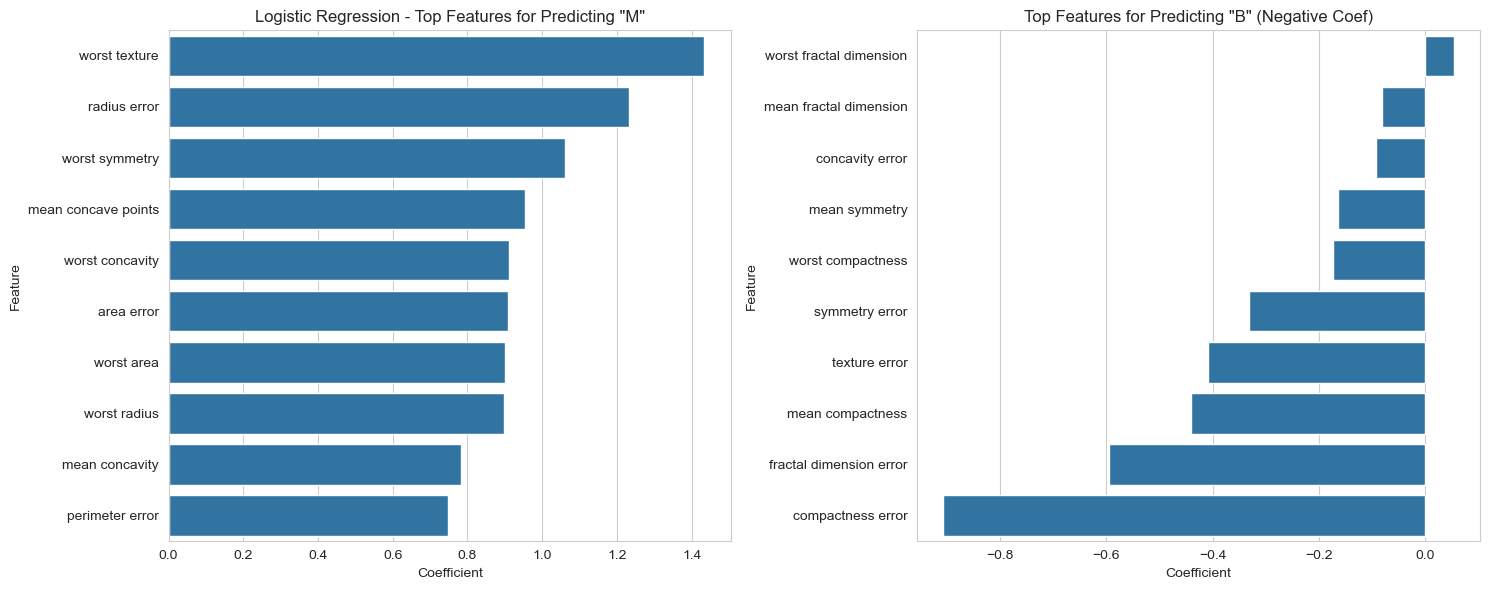

In [23]:
logreg_coefficients = logreg_model.coef_[0]

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_coefficients
}).sort_values('Coefficient', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.barplot(data=coef_df.head(10), x='Coefficient', y='Feature', ax=axes[0])
axes[0].set_title('Logistic Regression - Top Features for Predicting "M"')

sns.barplot(data=coef_df.tail(10), x='Coefficient', y='Feature', ax=axes[1])
axes[1].set_title('Top Features for Predicting "B" (Negative Coef)')

plt.tight_layout()
plt.show()

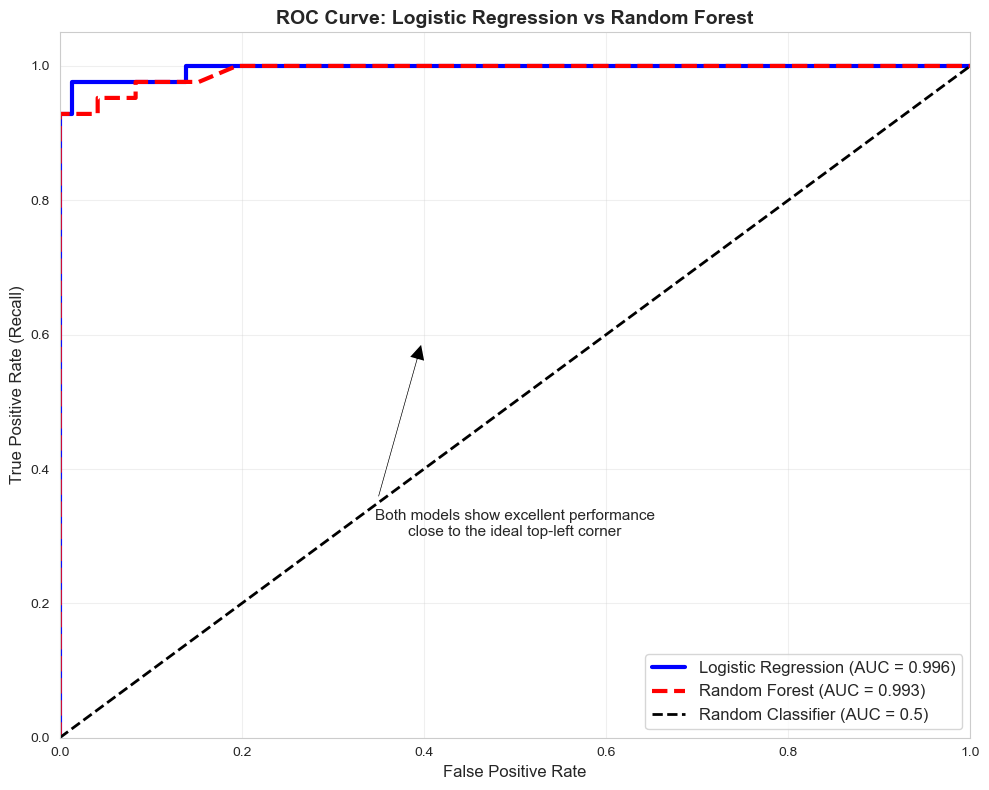

In [24]:
from sklearn.metrics import roc_curve 

fpr_logreg, tpr_logreg, _ = roc_curve(y_test_numeric, y_pred_proba_logreg)
fpr_rf, tpr_rf, _ = roc_curve(y_test_numeric, y_pred_proba_rf)

plt.figure(figsize=(10, 8))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.3f})', linewidth=3, color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})', linewidth=3, color='red', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.5)', linewidth=2)

plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve: Logistic Regression vs Random Forest', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.annotate('Both models show excellent performance\nclose to the ideal top-left corner', 
             xy=(0.4, 0.6), xytext=(0.5, 0.3),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=11, ha='center')

plt.tight_layout()
plt.show()